In [2]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [3]:
#Github URL
url = 'https://raw.githubusercontent.com/Gloriaihuoma/stage-f-07-heart-failure/master/data/heart_failure_clinical_records_dataset.csv'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Importing our dataset
Hf = pd.read_csv(url)

In [6]:
#checking the first 10 rows
Hf.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [7]:
#Checking the dataset description
Hf.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


There is a possiblity that we have outliers in creatinine_phosphokinase, platelets,serum_creatinine, ejection_fraction so we should confirm and remove the outliers


**CHECKING FOR OUTLIERS**

**Serum_creatinine** which is creatinine in your bloodstream. From my research, normal creatinine levels range from 0.9 to 1.3 mg/dl in men and 0.6 to 1.1mg/dl in women who are 18 to 60years. 
High serum creatinine levels in the blood indicate that the kidney aren't functioning well or a blocked urinary tract, dehydration etc.
Therefore we dont have any outlier for Seum_creatinine.

**Creatinine_phosphokinase**(CPK) is an enzyme found mainly in the heart, brain, and skeletal muscle. Normal CPK value is around 10 to 120.
High CPK Value can be as a result of stroke, heart attack, lung tissue death etc

**Finding outliers**
Ejection fraction (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat.

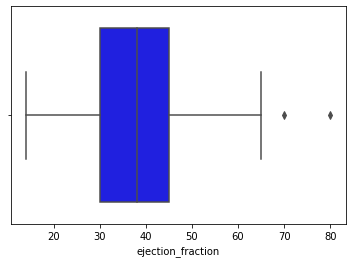

In [8]:
# Boxplot for ejection_fraction

sns.boxplot(x = Hf.ejection_fraction, color = 'Blue')
plt.show()

In [9]:
# Notice that the outliers are greater or equal to 70%, so we remove it.
Hf = Hf[Hf['ejection_fraction']< 70]


Platelets are the cells that circulate within our blood and bind together when recorgnize damamaged blood vessels.
Normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood.
There are no Outliers in Platelets because having more than 450,000 platelets is a condition called **thrombocytosisi.**
And less than 150,000 is known as **thrombcytopenia.**


In [10]:
#check for null values
Hf.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

We do not have any null

In [11]:
Hf.dtypes


age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

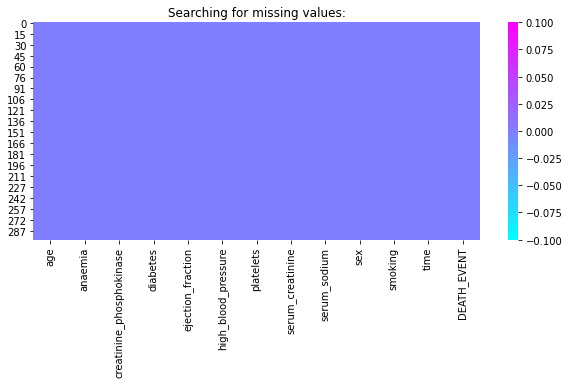

In [12]:
plt.figure(figsize=(10,4))
plt.title('Searching for missing values:')
sns.heatmap(data=Hf.isnull(),cmap = 'cool', cbar = True)

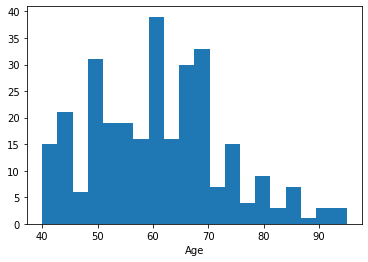

In [13]:
#Visualizing the continous variables
plt.hist(Hf["age"], bins=20)
plt.xlabel('Age')
plt.show()

In [14]:
Hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


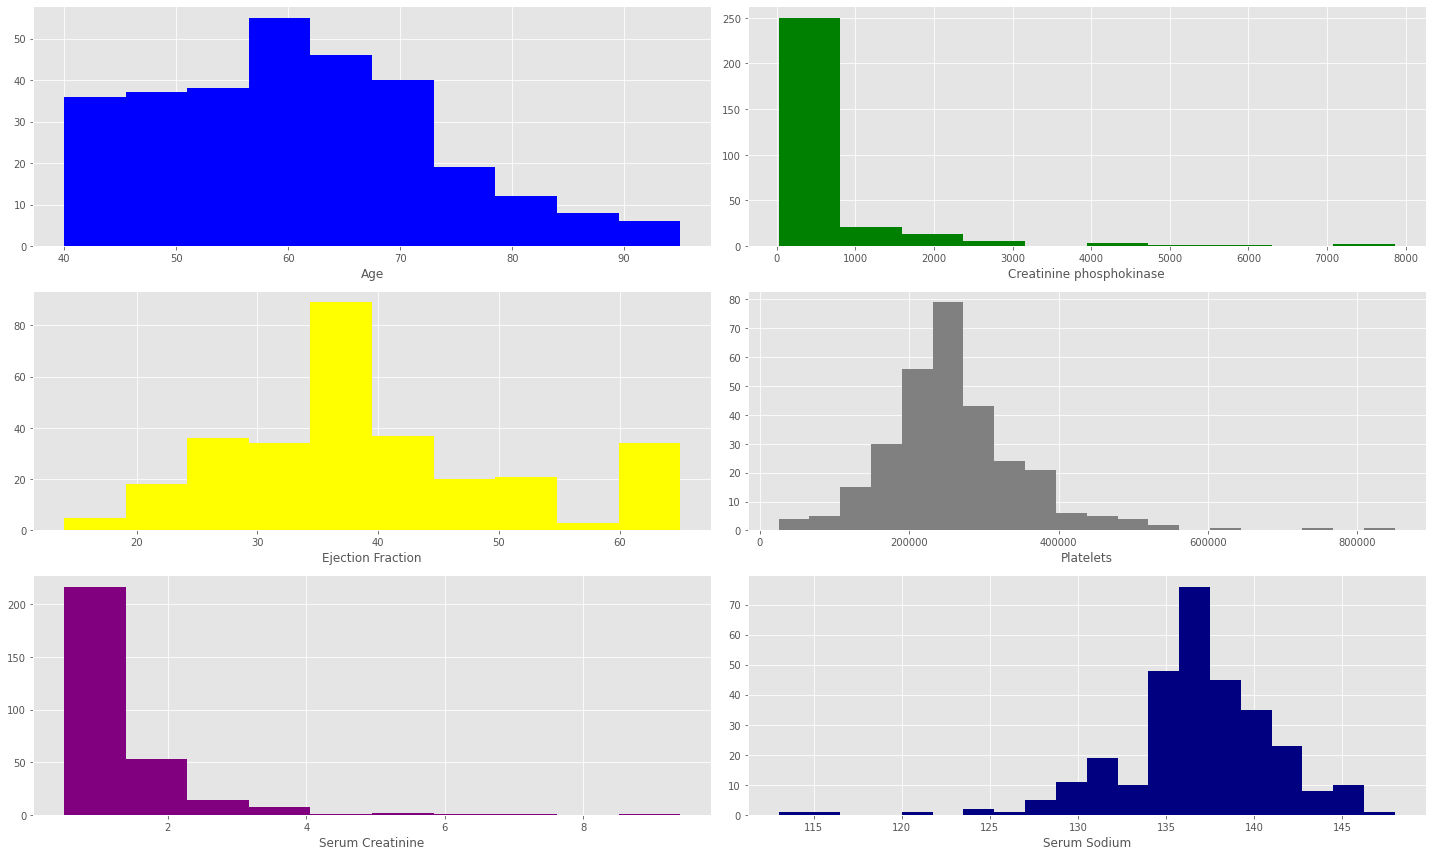

In [15]:
#this is easier to understand for continous variable
plt.style.use('ggplot')
fig, axis  = plt.subplots(nrows = 3, ncols = 2, figsize = (20,12))

ax0, ax1, ax2, ax3, ax4, ax5 = axis.flatten()

ax0.hist(Hf['age'], color= 'blue')
ax0.set_xlabel('Age')

ax1.hist(Hf['creatinine_phosphokinase'],color= 'green')
ax1.set_xlabel('Creatinine phosphokinase')

ax2.hist(Hf['ejection_fraction'],color= 'yellow')
ax2.set_xlabel('Ejection Fraction')

ax3.hist(Hf['platelets'],color= 'grey', bins = 20)
ax3.set_xlabel('Platelets')

ax4.hist(Hf['serum_creatinine'],color= 'purple')
ax4.set_xlabel('Serum Creatinine')

ax5.hist(Hf['serum_sodium'],color= 'navy', bins = 20)
ax5.set_xlabel('Serum Sodium')



plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

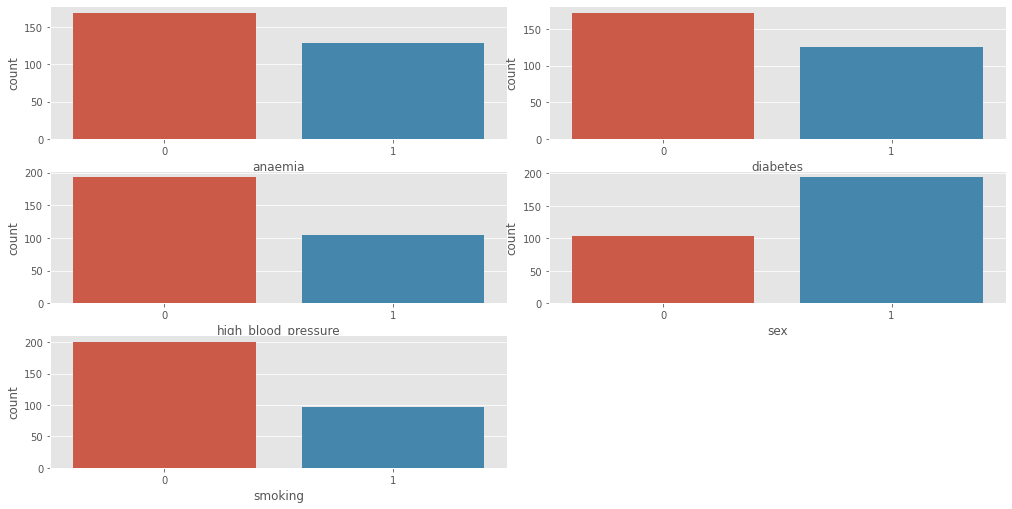

In [16]:
#Checking categorical variables
fig, ax  = plt.subplots(nrows = 3, ncols = 2, figsize = (14,7))
plt.tight_layout()
sns.countplot(Hf['anaemia'], ax=ax[0,0])
sns.countplot(Hf['diabetes'], ax=ax[0,1])
sns.countplot(Hf['high_blood_pressure'], ax=ax[1,0])
sns.countplot(Hf['sex'], ax=ax[1,1])
sns.countplot(Hf['smoking'], ax=ax[2,0])
fig.delaxes(ax[2,1])

For zero categories in sex are female while for the rest like anaemia it mean does not have anaemia

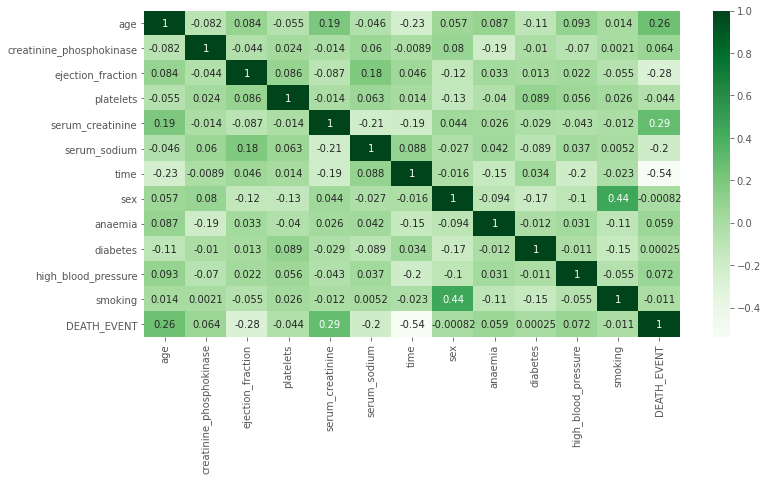

In [17]:
#using heatmap to check the correlation of the variables
plt.figure(figsize = (12,6))
sns.heatmap(Hf[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'sex', 'anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']].corr(), cmap = 'Greens', annot = True)

From the above heatmap we can see that ejection_fraction, platelets,serum_creatinine,time,sex and smoking has an inverse relationship with death_event

**Let's use plotly to visualize different variables and their relationship with death event**

In [18]:
import plotly.express as px
fig = px.histogram(Hf, x= "ejection_fraction", color="DEATH_EVENT", marginal="box", hover_data=Hf.columns,
                   title =" EJECTION FRACTION Vs DEATH_EVENT", 
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   template="plotly_dark")
fig.show()

Ejection fraction is not positively related to death event

In [19]:
import plotly.express as px
fig = px.histogram(Hf, x= "age", color="DEATH_EVENT", nbins= 20, hover_data=Hf.columns,
                   title =" Age Vs DEATH_EVENT", 
                   labels={"age": "Age"},
                   template="plotly_dark")
fig.show()

Age has a direct relationship with death event though more people die of heart failure at the age of 60 to 70

In [20]:
import plotly.express as px
fig = px.histogram(Hf, x= "sex", color="DEATH_EVENT", hover_data=Hf.columns,
                   title =" sex Vs DEATH_EVENT", 
                   labels={"sex": "Sex"},
                   template="plotly_dark")
fig.show()

In [21]:
#number of female in the dataset
Female = Hf['sex']== 0 
Female.value_counts()

False    194
True     103
Name: sex, dtype: int64

we have 103 females and 194 males

In [22]:
len(Hf[Hf['sex'] == 1])/len(Hf['sex'])

0.6531986531986532

65% of the dataset are male

In [23]:
len(Hf[Hf['sex'] == 0])/len(Hf['sex'])

0.3468013468013468

35% of the dataset are female

In [24]:
Hf[['sex', 'DEATH_EVENT']].groupby(['sex'], as_index = False).mean()

,sex,DEATH_EVENT
0,0,0.320388
1,1,0.319588


In [25]:
deathevent_sex = Hf.groupby(['sex','DEATH_EVENT']).count()
deathevent_sex.head()

age  anaemia  ...  smoking  time
sex DEATH_EVENT                ...               
0   0             70       70  ...       70    70
    1             33       33  ...       33    33
1   0            132      132  ...      132   132
    1             62       62  ...       62    62

[4 rows x 11 columns]

I observed though the population of male is greater than female in this dataset, but their deathevents are 32%.

Therefore the chances of any gender surviving is almost the same

In [26]:
import plotly.express as px
fig = px.histogram(Hf, x= "smoking", color="DEATH_EVENT", hover_data=Hf.columns,
                   title =" Smokers Vs DEATH_EVENT", 
                   labels={"smoking": "Smoking"},
                   template="plotly_dark",color_discrete_map={"0": "Green", "1": "Red"})
fig.show()

In [27]:
#fig = px.bar(Hf, x="sex", color="DEATH_EVENT", 
#            hover_data= Hf.columns, barmode = 'stack', ) 
  
#fig.show()